In [1]:
#1 Model Accuracy
#2 Best Model 
#3 Best Parameter 

In [2]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [7]:
from sklearn.pipeline import Pipeline

In [9]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

In [18]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

### Prepare multiple models

In [25]:
models = {"LogisticRegression" : LogisticRegression(),
          "DecisionTreeClassifier" : DecisionTreeClassifier(),
          "SVM" : SVC(),
          "KNeighborsClassifier" : KNeighborsClassifier(),
          "GNB" : GaussianNB(),
          "RandomForestClassifier" : RandomForestClassifier(),
          "AdaBoostClassifier" : AdaBoostClassifier(),
          "GradientBoostingClassifier" : GradientBoostingClassifier()}

### Function for training the multiple models and generating accuracy

In [26]:
#modelAccuracy-> models,x,y,scaleFlag=0,1,2
def Model_Accuracy(models, x, y, Scale_Flag):
    xtrain,xtest,ytrain,ytest=train_test_split(x, y, test_size=0.2, random_state=0)
    acc_result={}
    for name,model in models.items():
        if(Scale_Flag==1):
            model_pipeline = Pipeline([("MinMax",MinMaxScaler()),('model',model)])
        elif(Scale_Flag==2):
            model_pipeline = Pipeline([("standardScaler",StandardScaler()),('model',model)])
        else:
            model_pipeline = Pipeline([('model',model)])
        #model train and prediction
        model_fit = model_pipeline.fit(x_train,y_train)
        y_pred = model_fit.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name] = acc
    return acc_result

### Function for getting a model with highest accuracy

In [27]:
def Best_Model(model_result):
    high = 0
    for name,acc in model_result.items():
        if acc > high:
            high = acc
            model_name = name
    print("Best model is ",model_name," with Accuracy ",high)

### Function for getting a best models best parameters

In [57]:
def Best_Parameter(model, params, x_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
    grid_cv = GridSearchCV(estimator = model, param_grid = params, cv = cv, scoring = "accuracy")
    res = grid_cv.fit(x_train, y_train)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)

### Importing Data to find out suitable model for this classification dataset

In [58]:
df = pd.read_csv("sonar.csv", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [59]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [61]:
le = LabelEncoder()

df[60] = le.fit_transform(df[60])

df[60]

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: 60, Length: 208, dtype: int64

In [62]:
x = df.drop(columns = [60])
y = df[60]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [63]:
acc = Model_Accuracy(models,x,y,0)

The Accuracy for  LogisticRegression  is : 0.8333333333333334
The Accuracy for  DecisionTreeClassifier  is : 0.6666666666666666
The Accuracy for  SVM  is : 0.7857142857142857
The Accuracy for  KNeighborsClassifier  is : 0.7857142857142857
The Accuracy for  GNB  is : 0.6666666666666666
The Accuracy for  RandomForestClassifier  is : 0.8571428571428571
The Accuracy for  AdaBoostClassifier  is : 0.8809523809523809
The Accuracy for  GradientBoostingClassifier  is : 0.8809523809523809


In [64]:
acc

{'LogisticRegression': 0.8333333333333334,
 'DecisionTreeClassifier': 0.6666666666666666,
 'SVM': 0.7857142857142857,
 'KNeighborsClassifier': 0.7857142857142857,
 'GNB': 0.6666666666666666,
 'RandomForestClassifier': 0.8571428571428571,
 'AdaBoostClassifier': 0.8809523809523809,
 'GradientBoostingClassifier': 0.8809523809523809}

In [65]:
Best_Model(acc)

Best model is  AdaBoostClassifier  with Accuracy  0.8809523809523809


In [66]:
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble._weight_boosting:

class AdaBoostClassifier(sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
 |  
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost-SAMME [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  base_estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample weighting is requi

In [67]:
#model = GradientBoostingClassifier()
#params = {"loss":['deviance', 'exponential'],"learning_rate":[0.3,0.1,0.5,0.001,0.01,0.05],"n_estimators":[10,50,100]}
#Best_Parameter(model,params,xtrain,ytrain)

In [68]:
model = AdaBoostClassifier()
params = {"algorithm":['SAMME', 'SAMME.R'],"learning_rate":[0.3,0.1,0.5,0.001,0.01,0.05],"n_estimators":[10,50,100]}
Best_Parameter(model, params, x_train, y_train)


Best Parameters are  {'algorithm': 'SAMME', 'learning_rate': 0.3, 'n_estimators': 100}
Best Accuracy is  0.8354166666666667


### Retraining The model using best parameters

In [69]:
#Retraining The model using best parameters
model = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 0.3, n_estimators = 100)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

### Evaluation of Best Model on testing Dataset

Accuracy is : 0.8571428571428571
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.86      0.86      0.86        21

    accuracy                           0.86        42
   macro avg       0.86      0.86      0.86        42
weighted avg       0.86      0.86      0.86        42



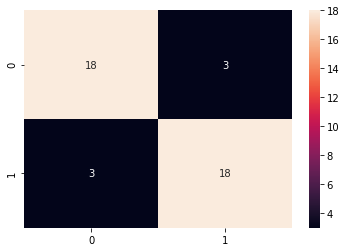

In [70]:
print("Accuracy is :",accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)